In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [110]:
# Load the data
# get path to files
path = '/Users/simenguttormsen/Dropbox/SimenDuke/CompSci671/KaggleProject/cs-671-fall-2024-final-project/'

df_train = pd.read_csv(path + 'train.csv', parse_dates=['host_since', 'first_review', 'last_review'])
df_test = pd.read_csv(path + 'test.csv', parse_dates=['host_since', 'first_review', 'last_review'])
# df_sample_submission = pd.read_csv(path + 'sample_submission.csv')


In [27]:
df_train.columns

Index(['name', 'description', 'property_type', 'price',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'instant_bookable',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'rev

In [4]:
df_train.head()

,name,description,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews
0,Bed-Stuy 2 Bed/2 Bath - Renovated,"Welcome to Bed-Stuy, Brooklyn! Our newly renov...",Entire rental unit,4,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,2015-05-23,within a day,...,2024-08-10,5.00,5.00,4.97,5.0,5.0,4.71,4.94,0.52,"Barry's place was perfect. It was cute, modern..."
1,Victorian Flatbush Oasis,"Lovely nonsmoking annex in Brooklyn's ""secret ...",Private room in rental unit,3,Flatbush,Brooklyn,40.638991,-73.965739,2023-09-14,within an hour,...,2024-09-02,4.83,4.87,4.93,4.8,4.9,4.90,4.63,3.81,I booked this place last minute to attend a fu...
2,Bay Ridge Metroscape: Inviting NYC Studio Living,This studio presents unparalleled convenience ...,Entire rental unit,3,Fort Hamilton,Brooklyn,40.618810,-74.032380,2022-07-31,within an hour,...,2024-08-17,4.60,4.80,4.20,4.8,4.8,4.80,4.20,2.14,Great spot! Little far out but overall a great...
3,"New HDTV room, 20 minutes to Manhattan #724",- Furnished room in a newly renovated apartmen...,Private room in rental unit,0,Crown Heights,Brooklyn,40.673970,-73.953990,2012-08-11,within an hour,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Just What You Were Looking For! Pets Allowed,This modern property in Manhattan is just step...,Room in hotel,2,Midtown,Manhattan,40.747180,-73.985390,2014-12-23,within an hour,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Get basic information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15696 entries, 0 to 15695
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          15696 non-null  object        
 1   description                                   15309 non-null  object        
 2   property_type                                 15696 non-null  object        
 3   price                                         15696 non-null  int64         
 4   neighbourhood_cleansed                        15696 non-null  object        
 5   neighbourhood_group_cleansed                  15696 non-null  object        
 6   latitude                                      15696 non-null  float64       
 7   longitude                                     15696 non-null  float64       
 8   host_since                                    15696 non-null  date

In [6]:
# Describe numerical features
df_train.describe()

,price,latitude,longitude,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,15696.000000,15696.000000,15696.000000,15696,13493.000000,13643.000000,15696.000000,15696.000000,15696.000000,15696.000000,...,11222,11222,11222.000000,11222.000000,11222.000000,11222.00000,11222.000000,11221.000000,11222.000000,11222.000000
mean,2.465724,40.726899,-73.943147,2017-10-28 15:01:06.055045888,91.383013,78.579198,288.106588,393.435143,74.901631,45.303772,...,2021-02-06 17:41:35.170201344,2023-11-07 02:26:40.142577152,4.719393,4.742812,4.679642,4.82631,4.808233,4.721844,4.609505,1.245801
min,0.000000,40.500366,-74.251907,2008-08-11 00:00:00,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,2009-08-09 00:00:00,2011-12-10 00:00:00,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.010000
25%,1.000000,40.685686,-73.983133,2014-11-18 00:00:00,97.000000,69.000000,1.000000,2.000000,1.000000,0.000000,...,2019-04-10 06:00:00,2023-09-04 00:00:00,4.660000,4.690000,4.590000,4.81000,4.800000,4.630000,4.510000,0.210000
50%,2.000000,40.725251,-73.952458,2017-05-25 00:00:00,100.000000,91.000000,3.000000,5.000000,3.000000,1.000000,...,2022-04-12 00:00:00,2024-04-30 00:00:00,4.850000,4.880000,4.820000,4.94000,4.940000,4.820000,4.750000,0.610000
75%,4.000000,40.762314,-73.921120,2021-04-18 00:00:00,100.000000,100.000000,21.000000,31.000000,17.000000,4.000000,...,2023-05-31 00:00:00,2024-08-07 00:00:00,5.000000,5.000000,4.980000,5.00000,5.000000,5.000000,4.890000,1.650000
max,5.000000,40.911390,-73.713650,2024-08-31 00:00:00,100.000000,100.000000,4494.000000,9019.000000,876.000000,876.000000,...,2024-09-03 00:00:00,2024-09-04 00:00:00,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,110.100000
std,1.709624,0.058079,0.060149,NaN,22.320590,27.896484,984.327077,1205.427544,198.042132,166.432525,...,NaN,NaN,0.462927,0.460347,0.483314,0.37655,0.433165,0.400359,0.512808,2.269312


# General Preprocessing 

In [87]:
# fix amenities:

# fix amenities
df_train['amenities'] = df_train['amenities'].apply(lambda x: x.replace('[', '').replace(']', '').replace('"', '').split(', '))
# do the same for df_test
df_test['amenities'] = df_test['amenities'].apply(lambda x: x.replace('[', '').replace(']', '').replace('"', '').split(', '))


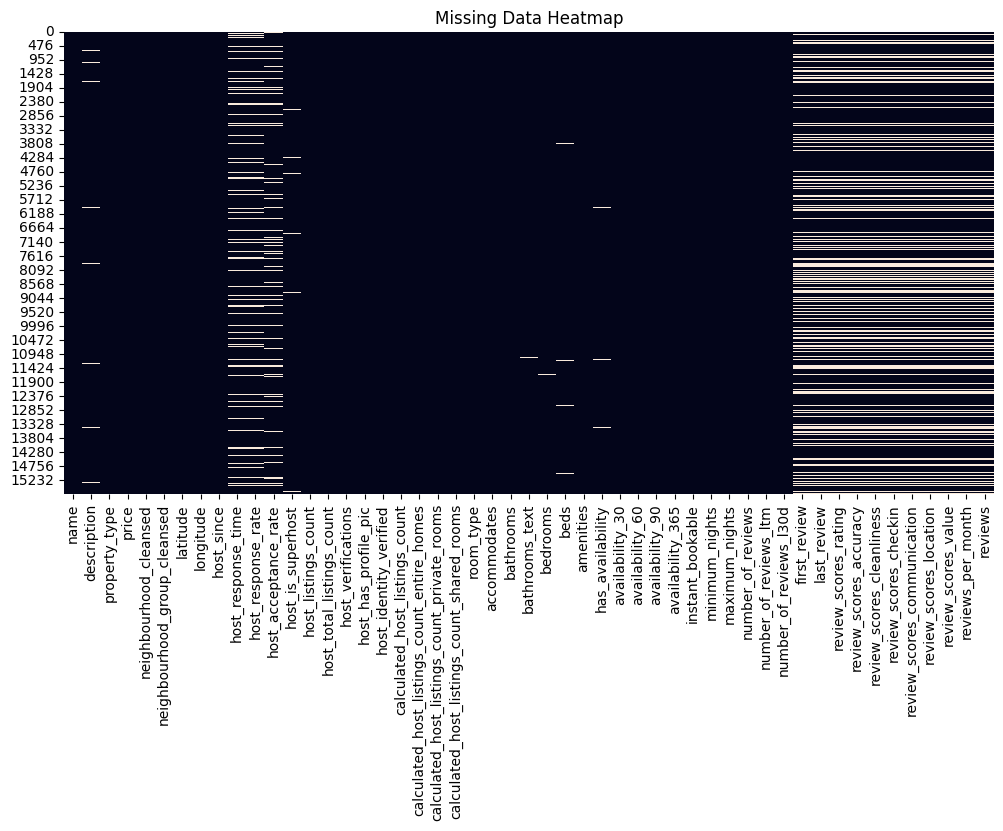

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df_train.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()


In [92]:
# Get the number of missing values per column in X_train
missing_values = df_train.isnull().sum()

missing_values_df = missing_values.to_frame('missing_values')
missing_values_df["Column"] = df_train.columns

# write ascending
missing_values_df.sort_values(by='missing_values', ascending=False).head(20)


,missing_values,Column
review_scores_location,4475,review_scores_location
reviews,4474,reviews
review_scores_rating,4474,review_scores_rating
reviews_per_month,4474,reviews_per_month
review_scores_value,4474,review_scores_value
review_scores_communication,4474,review_scores_communication
review_scores_checkin,4474,review_scores_checkin
review_scores_cleanliness,4474,review_scores_cleanliness
review_scores_accuracy,4474,review_scores_accuracy
first_review,4474,first_review


# Check price distribution

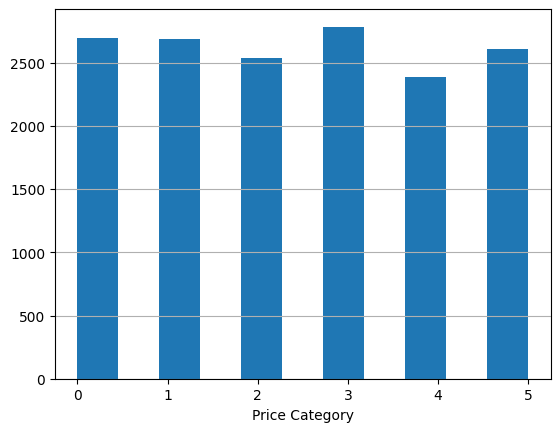

In [23]:
# plot price disribution

df_train["price"].hist(bins=11)
plt.grid(axis='x')
plt.xlabel('Price Category')
# plt.title('Price Distribution')
plt.show()

# Numerical Features distributions

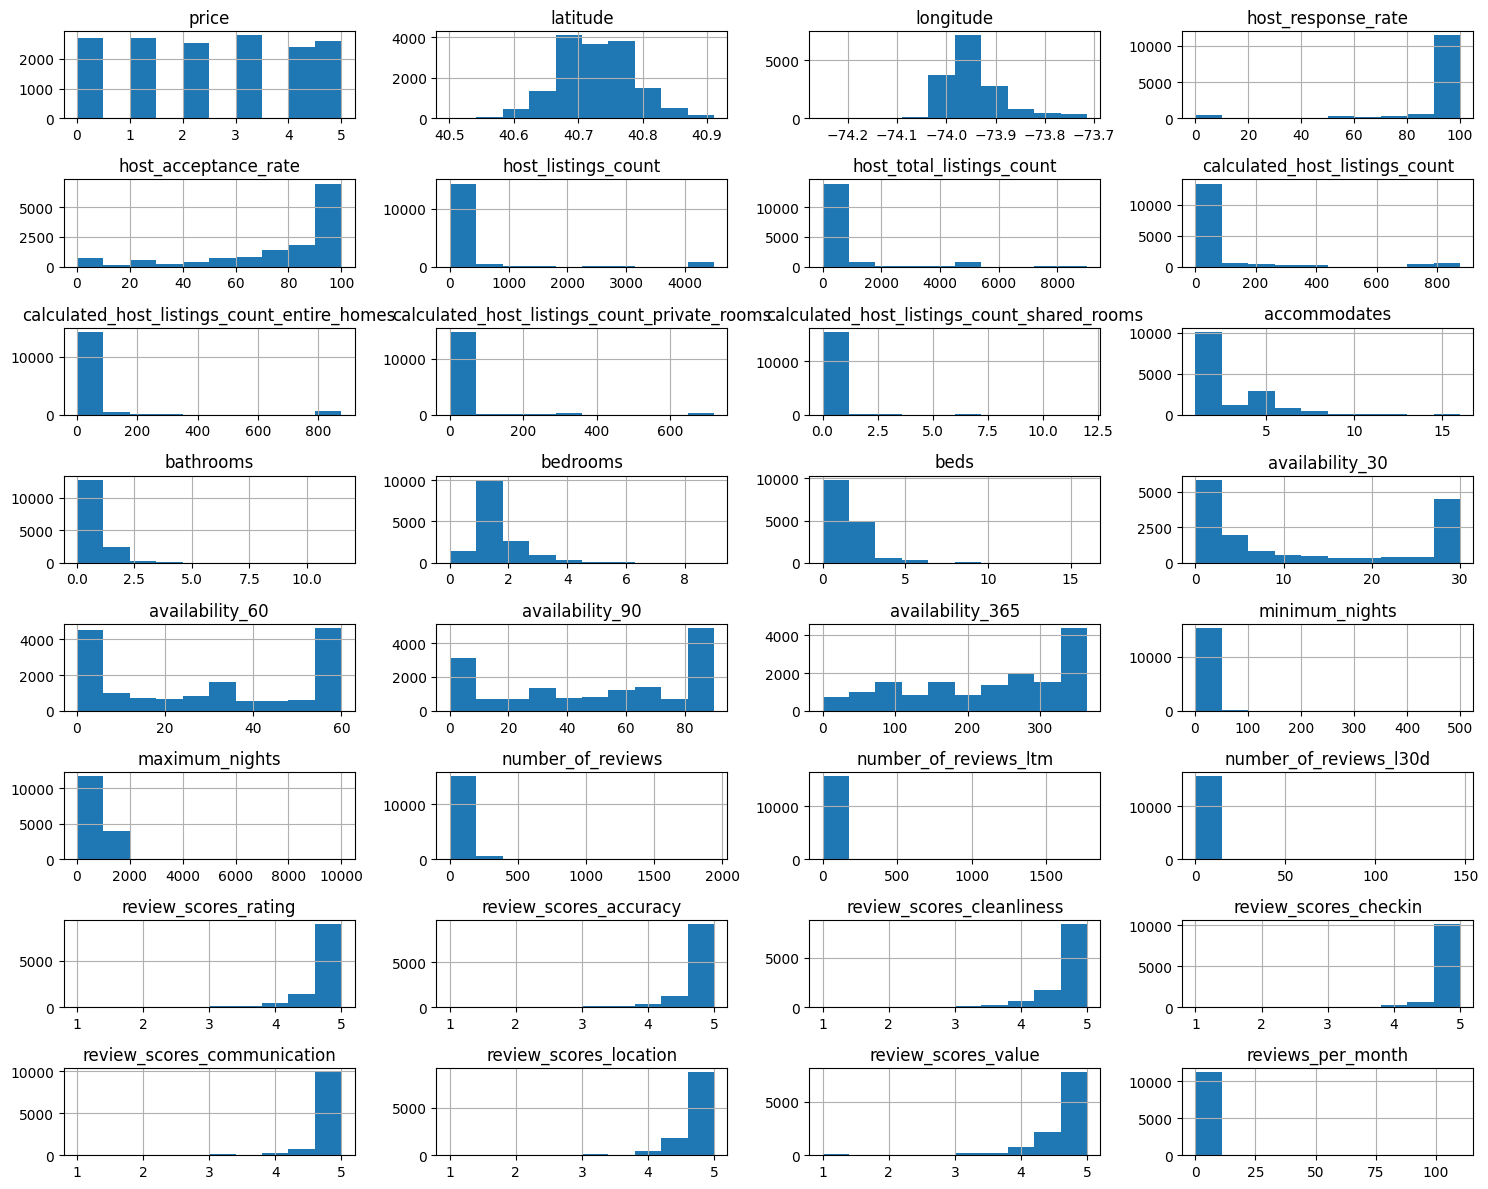

In [128]:
# numerical_features = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds']
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_train[numerical_features].hist(figsize=(15, 12), layout=(8,4))
plt.tight_layout()
plt.show()

# Categorical features vs price

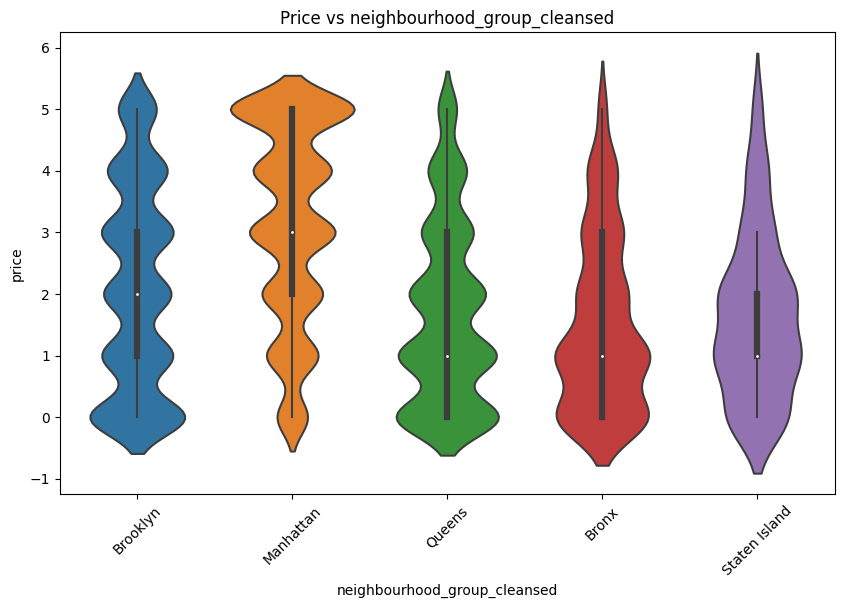

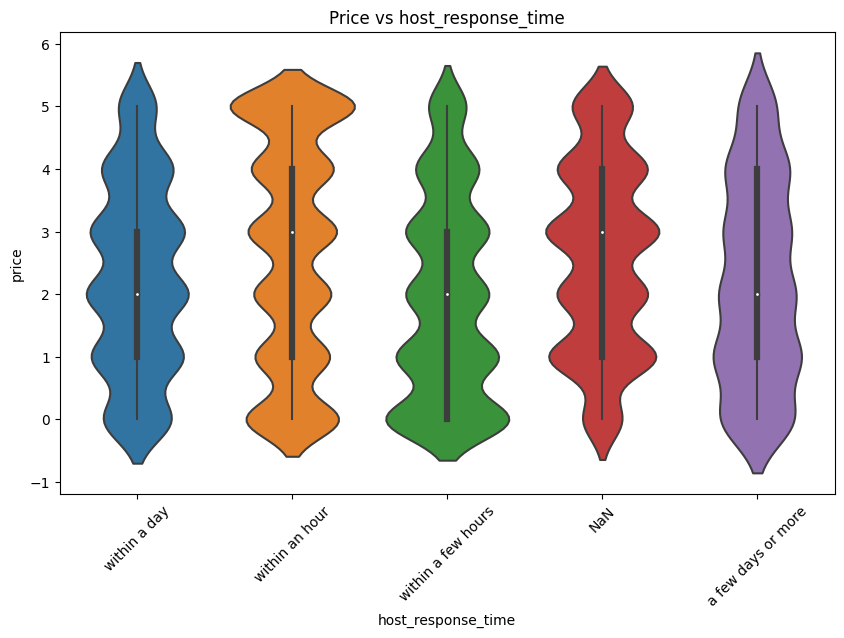

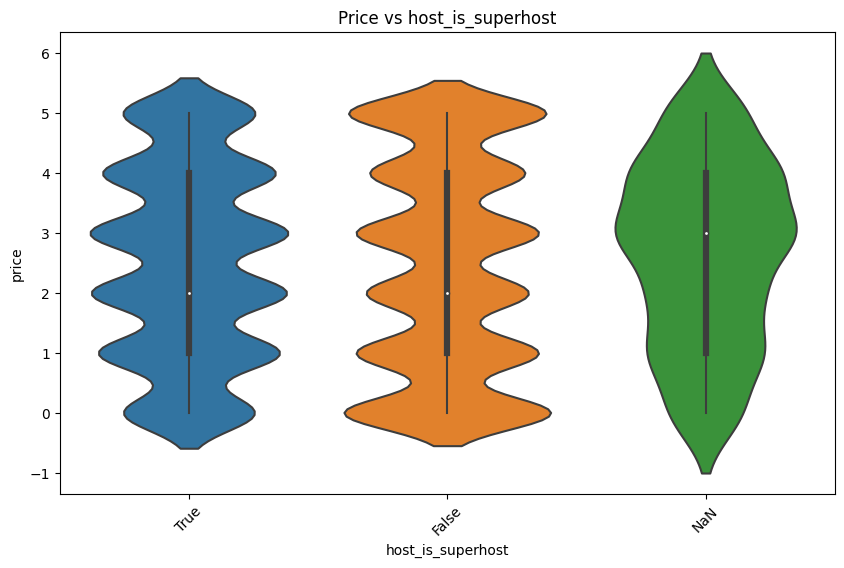

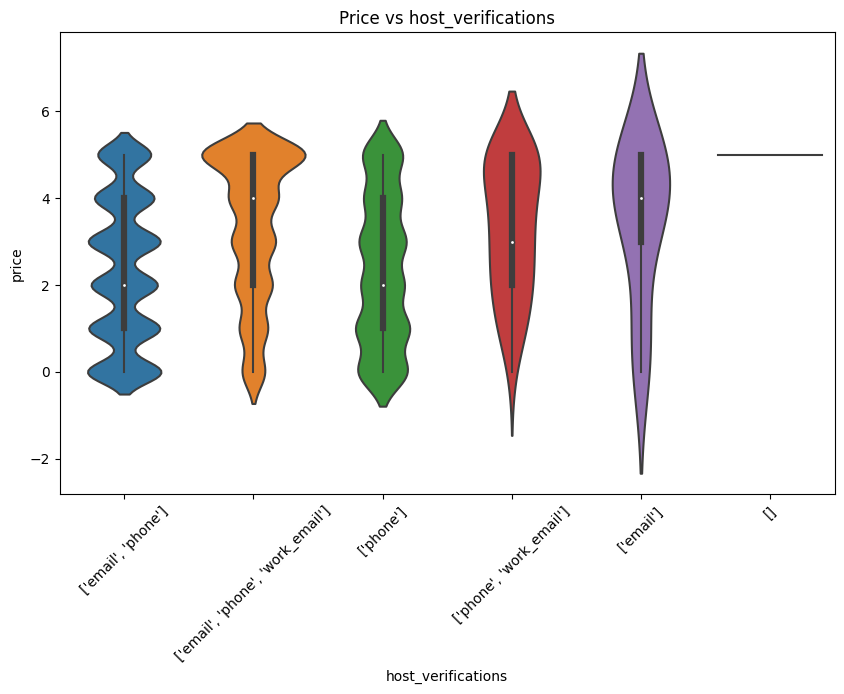

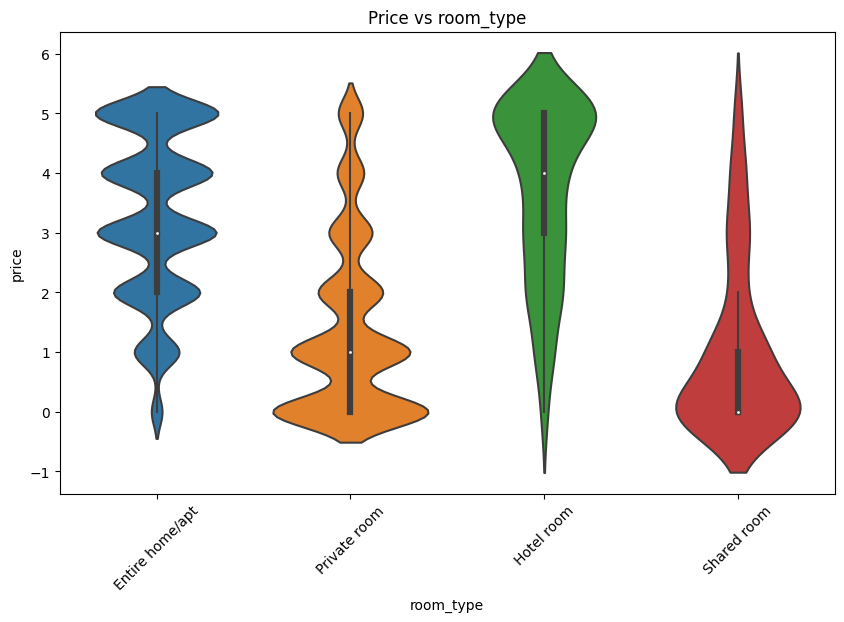

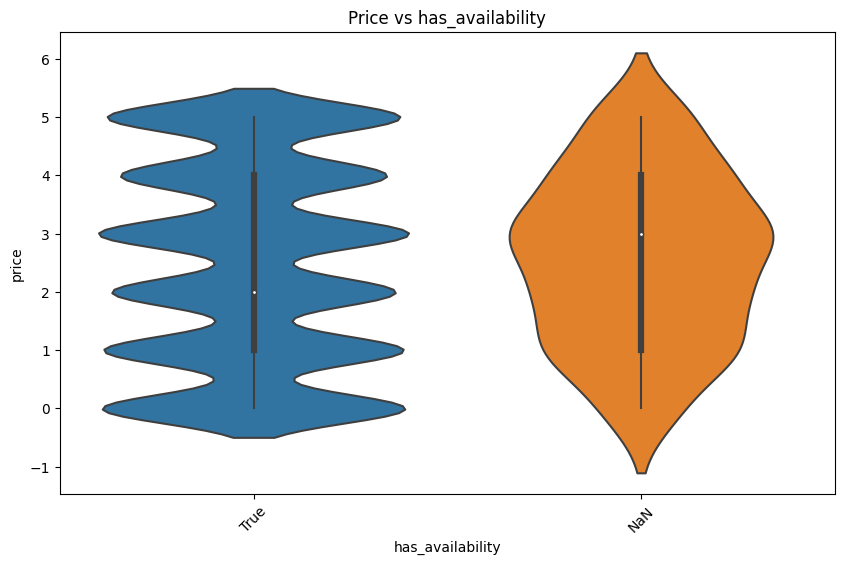

In [29]:
categorical_features_all = df_train.select_dtypes(include=['object']).columns.tolist()

categorical_features = []
for feature in categorical_features_all:
    if df_train[feature].nunique() < 10:
        # add to categorical_features list
        categorical_features.append(feature)

        # include nan if it exists
        plt.figure(figsize=(10, 6))
        # Create a copy of the data and fill NaN with a placeholder
        plot_data = df_train.copy()
        if plot_data[feature].isnull().any():
            plot_data[feature] = plot_data[feature].fillna('NaN')
        sns.violinplot(x=feature, y='price', data=plot_data, showfliers=True)
        plt.title(f'Price vs {feature}')
        plt.xticks(rotation=45)
        plt.show()


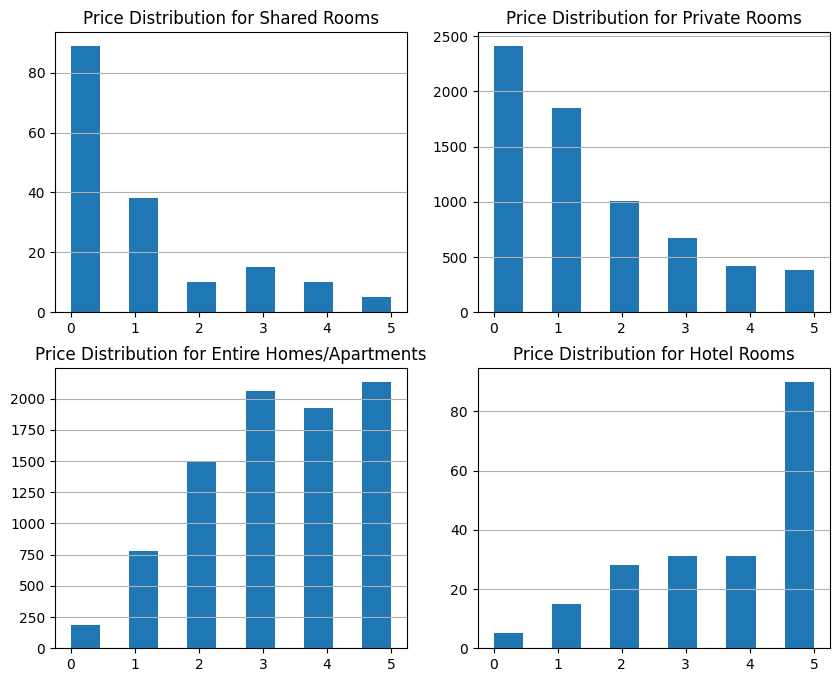

In [73]:
# plot in 2 x 2 grid

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
df_train[df_train["room_type"] == "Shared room"]["price"].hist(ax=axes[0,0], bins=11)
axes[0,0].set_title('Price Distribution for Shared Rooms')
axes[0,0].grid(axis='x')
df_train[df_train["room_type"] == "Private room"]["price"].hist(ax=axes[0,1], bins=11)
axes[0,1].set_title('Price Distribution for Private Rooms')
axes[0,1].grid(axis='x')
df_train[df_train["room_type"] == "Entire home/apt"]["price"].hist(ax=axes[1,0], bins=11)
axes[1,0].set_title('Price Distribution for Entire Homes/Apartments')
axes[1,0].grid(axis='x')
df_train[df_train["room_type"] == "Hotel room"]["price"].hist(ax=axes[1,1], bins=11)
axes[1,1].set_title('Price Distribution for Hotel Rooms')
axes[1,1].grid(axis='x')
plt.show()


# num beds vs price

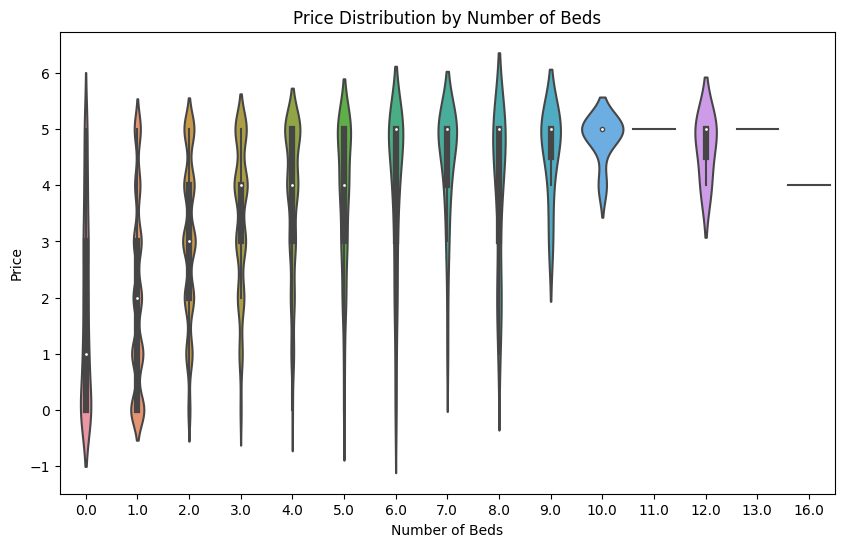

In [56]:
# sns violin plot of beds vs price
plt.figure(figsize=(10, 6))
sns.violinplot(x='beds', y='price', data=df_train)
plt.title('Price Distribution by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Price')
plt.show()


# Amenities

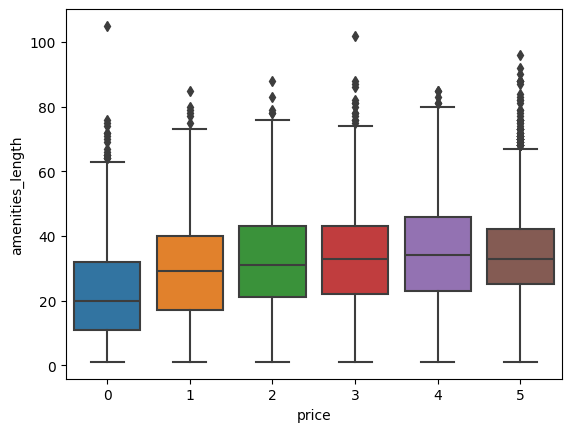

In [95]:
# make a column with the length of their amenities
df_train["amenities_length"] = df_train["amenities"].apply(len)

# amenities length vs price
sns.boxplot(x="price", y="amenities_length", data=df_train)
plt.show()

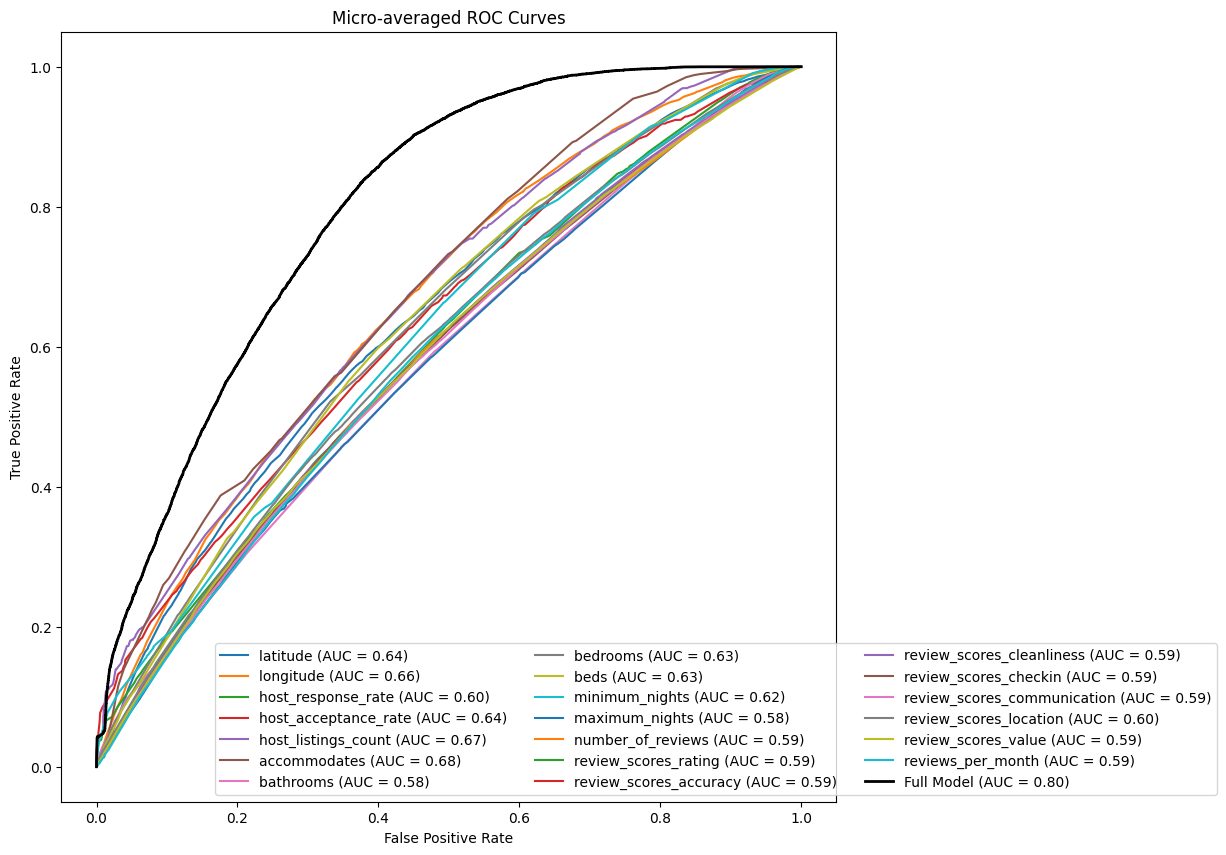

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import label_binarize


# Get features for X_train
numeric_features = ['latitude', 'longitude', 'host_response_rate', 'host_acceptance_rate',
                   'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
                   'minimum_nights', 'maximum_nights', 'number_of_reviews',
                   'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                   'review_scores_checkin', 'review_scores_communication',
                   'review_scores_location', 'review_scores_value', 'reviews_per_month']

X_train = df_train[numeric_features].copy()
y_train = df_train['price']

# Handle missing values
X_train = X_train.fillna(X_train.mean())

# Binarize the output for multi-class ROC
y_train_bin = label_binarize(y_train, classes=range(6))
n_classes = 6

plt.figure(figsize=(10, 10))
for i in range(X_train.shape[1]):
    ada_col = AdaBoostClassifier(random_state=10, n_estimators=50)
    ada_col.fit(X_train.iloc[:,i].values.reshape(-1,1), y_train)
    
    # Compute ROC curve and ROC area for each class
    y_pred_proba = ada_col.predict_proba(X_train.iloc[:,i].values.reshape(-1,1))
    
    # Compute micro-average ROC curve and ROC area
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_train_bin[:, j], y_pred_proba[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])
    
    # Compute micro-average ROC curve and ROC area
    fpr_micro, tpr_micro, _ = roc_curve(y_train_bin.ravel(), y_pred_proba.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, label=f'{numeric_features[i]} (AUC = {roc_auc_micro:.2f})')

ada = AdaBoostClassifier(random_state=10, n_estimators=50)
ada.fit(X_train, y_train)
y_pred_proba_full = ada.predict_proba(X_train)

# Compute micro-average ROC curve and ROC area for full model
fpr_micro_full, tpr_micro_full, _ = roc_curve(y_train_bin.ravel(), y_pred_proba_full.ravel())
roc_auc_full = auc(fpr_micro_full, tpr_micro_full)
plt.plot(fpr_micro_full, tpr_micro_full, label=f"Full Model (AUC = {roc_auc_full:.2f})", color="black", linewidth=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('Micro-averaged ROC Curves')
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0), ncol=3)
plt.show()

In [100]:
all_amenities = set()
for amenities in df_train['amenities']:
    all_amenities.update(amenities)

In [136]:
# write all_amenities to a file
with open('all_amenities.txt', 'w') as f:
    for amenity in all_amenities:
        f.write(f"{amenity}\n")

In [1]:
# count how many times each amenity occur from the list of all the possible amenities
# amenity_counts = {}
# for amenity in all_amenities:
#     amenity_counts[amenity] = df_train["amenities"].apply(lambda x: amenity in x).sum()

In [107]:
# print descening order
sorted(amenity_counts.items(), key=lambda x: x[1], reverse=True)
# save as "all-amenities.txt"
with open('all_amenities.txt', 'w') as f:
    for amenity, count in sorted(amenity_counts.items(), key=lambda x: x[1], reverse=True):
        f.write(f"{amenity}: {count}\n")


In [102]:
# reload luxury_calculator to be correctly updated 
import importlib
import luxury_calculator
importlib.reload(luxury_calculator)

# import the updated luxury_calculator
from luxury_calculator import SimpleLuxuryCalculator

def calculate_luxury_metrics(amenities_list):
    calculator = SimpleLuxuryCalculator()
    if isinstance(amenities_list, list):
        score = calculator.calculate_score(amenities_list)
        level = calculator.get_luxury_level(score)
        return {'luxury_score': score, 'luxury_level': level}
    return {'luxury_score': 0, 'luxury_level': 'Standard'}

# Apply the calculator to DataFrame
luxury_results = df_train['amenities'].apply(calculate_luxury_metrics)

# Create new columns for luxury score and level
df_train['luxury_score'] = luxury_results.apply(lambda x: x['luxury_score'])
df_train['luxury_level'] = luxury_results.apply(lambda x: x['luxury_level'])
# split the luxury_score into quantiles
df_train['luxury_score_quantile'] = pd.qcut(df_train['luxury_score'], q=5, labels=False)

# Display summary statistics
print("\nLuxury Score Statistics:")
print(df_train['luxury_score'].describe())

print("\nLuxury Level Distribution:")
print(df_train['luxury_level'].value_counts())


Luxury Score Statistics:
count    15696.000000
mean         0.436947
std          0.127811
min          0.000000
25%          0.360000
50%          0.450000
75%          0.520000
max          0.850000
Name: luxury_score, dtype: float64

Luxury Level Distribution:
luxury_level
3    9175
2    4325
4    1465
1     714
5      17
Name: count, dtype: int64


luxury_level
3    9270
2    4839
4     859
1     722
5       6
Name: count, dtype: int64

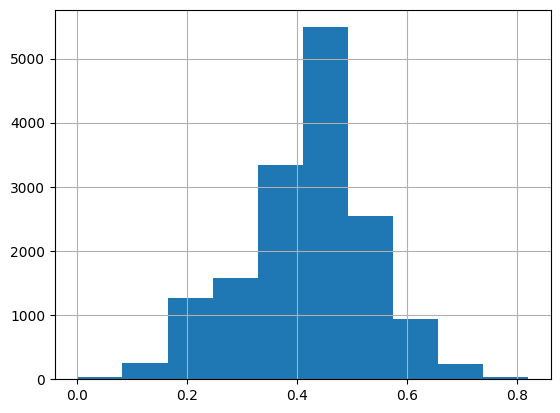

In [138]:
df_train['luxury_score'].hist()
df_train['luxury_level'].value_counts()

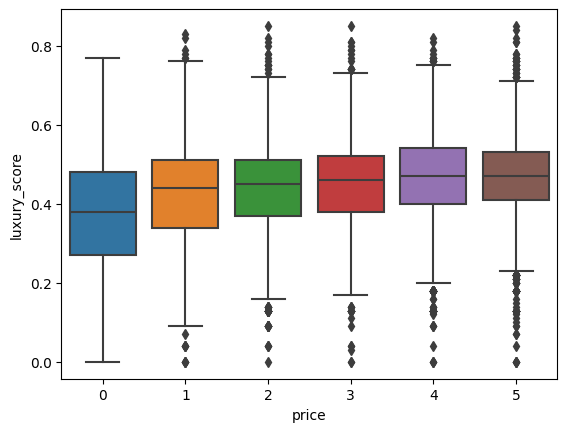

In [103]:
sns.boxplot(x="price", y="luxury_score", data=df_train)
plt.show()

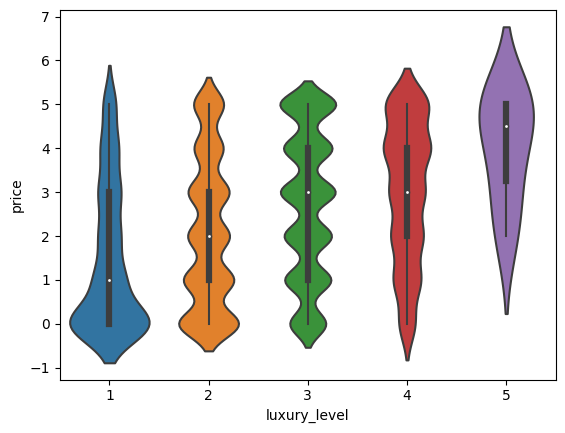

In [139]:
# make boxplot with luxurry_level and price
sns.violinplot(x='luxury_level', y='price', data=df_train)
plt.show()

# Note: this boxplot might be alittle biased as there are very few values for some of the luxury levels

In [105]:
# extract information from bathroom column
# extract number in bathrooms_text and if shared or not
df_train["num_bathrooms"] = df_train['bathrooms_text'].str.extract(r'(\d+(?:\.\d+)?)', expand=False)
df_train['private_bathroom'] = df_train['bathrooms_text'].str.contains('shared') == False

In [106]:
# map host_response_time to a numerical integer
response_time_mapping = {
    'within an hour': 1,
    'within a few hours': 2, 
    'within a day': 3,
    'a few days or more': 4
}
df_train['host_response_time_encoded'] = df_train['host_response_time'].map(response_time_mapping).astype('Int64')

In [107]:
# recover the original list form of the reviews
df_train['reviews'] = df_train['reviews'].apply(lambda x: x.split("\n---------------------------------\n") if isinstance(x, str) else [])
df_test['reviews'] = df_test['reviews'].apply(lambda x: x.split("\n---------------------------------\n") if isinstance(x, str) else [])

# Check for correlation between numerical features

In [108]:
# check for correlation between numerical features
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr = df_train[numerical_features].corr()
corr

,price,latitude,longitude,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,amenities_length,luxury_score,luxury_level,luxury_score_quantile,host_response_time_encoded
price,1.000000,0.059409,-0.291887,0.060072,0.182712,0.310123,0.286618,0.104923,0.317481,-0.283525,...,0.048556,0.041081,0.147855,0.005540,0.123218,0.233753,0.220003,0.222197,0.195366,-0.125431
latitude,0.059409,1.000000,0.026766,-0.015806,0.041229,0.081123,0.090837,0.037059,0.089232,-0.072407,...,-0.058238,-0.054121,0.007819,-0.082861,-0.042615,-0.068899,-0.078840,-0.074716,-0.081636,0.001579
longitude,-0.291887,0.026766,1.000000,-0.026351,0.027344,-0.177540,-0.186911,-0.145960,-0.177314,0.014496,...,0.008775,0.028370,-0.128582,0.062770,0.008986,0.067577,0.049128,0.031102,0.080529,0.019452
host_response_rate,0.060072,-0.015806,-0.026351,1.000000,0.440300,0.108883,0.116224,0.112192,0.085668,0.062378,...,0.048426,0.067516,0.017165,0.031822,0.088269,0.135891,0.119916,0.105997,0.115942,-0.744454
host_acceptance_rate,0.182712,0.041229,0.027344,0.440300,1.000000,0.063722,0.051908,-0.074253,0.119072,-0.299606,...,0.006723,0.025985,-0.024702,0.000569,0.190061,0.200106,0.152482,0.147200,0.151525,-0.464558
host_listings_count,0.310123,0.081123,-0.177540,0.108883,0.063722,1.000000,0.942950,0.809945,0.896576,0.062545,...,-0.060612,-0.127082,-0.017663,-0.164973,-0.057548,0.011237,0.065300,0.064699,0.069502,-0.192373
host_total_listings_count,0.286618,0.090837,-0.186911,0.116224,0.051908,0.942950,1.000000,0.770877,0.779223,0.142326,...,-0.071552,-0.134124,-0.022695,-0.180032,-0.056755,-0.025278,0.032981,0.042581,0.025083,-0.201500
calculated_host_listings_count,0.104923,0.037059,-0.145960,0.112192,-0.074253,0.809945,0.770877,1.000000,0.801910,0.539947,...,-0.096549,-0.176119,-0.033271,-0.205761,-0.088601,-0.126213,-0.035982,-0.046982,-0.030144,-0.187182
calculated_host_listings_count_entire_homes,0.317481,0.089232,-0.177314,0.085668,0.119072,0.896576,0.779223,0.801910,1.000000,-0.061156,...,-0.056153,-0.127220,0.001261,-0.178718,-0.072421,0.023919,0.088764,0.082023,0.102519,-0.160407
calculated_host_listings_count_private_rooms,-0.283525,-0.072407,0.014496,0.062378,-0.299606,0.062545,0.142326,0.539947,-0.061156,1.000000,...,-0.082703,-0.115249,-0.061595,-0.084854,-0.047899,-0.238215,-0.180540,-0.194077,-0.185139,-0.075003


# MISSING VALUES MEANINGFUL

/Users/simenguttormsen/miniforge3/envs/test_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simenguttormsen/miniforge3/envs/test_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


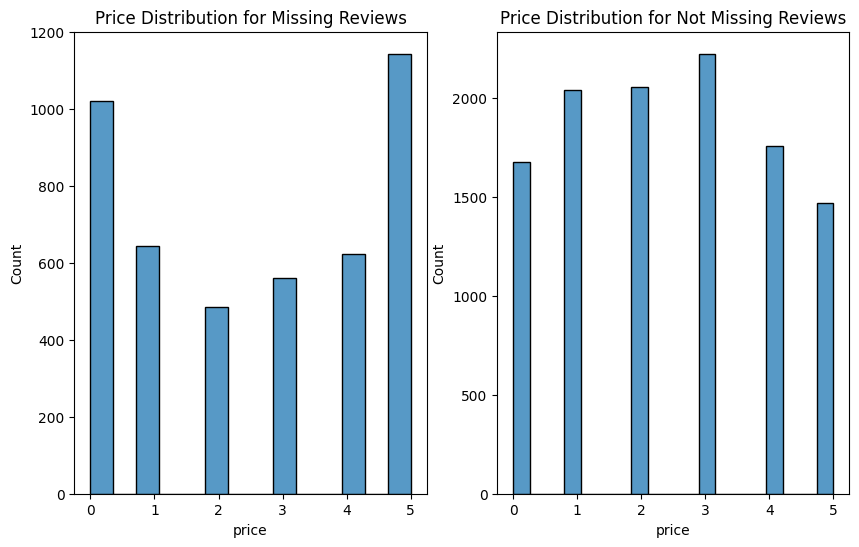

In [134]:
# plot side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# distribution of price for missing reviews
sns.histplot(x=df_train[df_train["reviews"].isnull()]["price"], ax=axes[0])
axes[0].set_title('Price Distribution for Missing Reviews')

# distribution of price for not missing reviews
sns.histplot(x=df_train[df_train["reviews"].notnull()]["price"], ax=axes[1])
axes[1].set_title('Price Distribution for Not Missing Reviews')

plt.show()
# print the value coutns for each


In [52]:
# correlation value between reviews == 0 vs reviews > 0 and price

zero_reviews = (df_train['number_of_reviews'] == 0).astype(int)
# Calculate correlation between price and zero_reviews indicator
correlation = df_train['price'].corr(zero_reviews)
print(f"Correlation between price and zero reviews indicator: {correlation}")

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_train['price'], zero_reviews)

# Perform chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Correlation between price and zero reviews indicator: 0.03891127392477859
Chi-square statistic: 653.7518174169488
P-value: 4.892447289604815e-139


There is a correlation, so in our model, we should include the zero_reviews indicator!


In [112]:
df_train["property_type"] = df_train["property_type"].apply(lambda x: "other" if df_train["property_type"].value_counts()[x] < 125 else x)

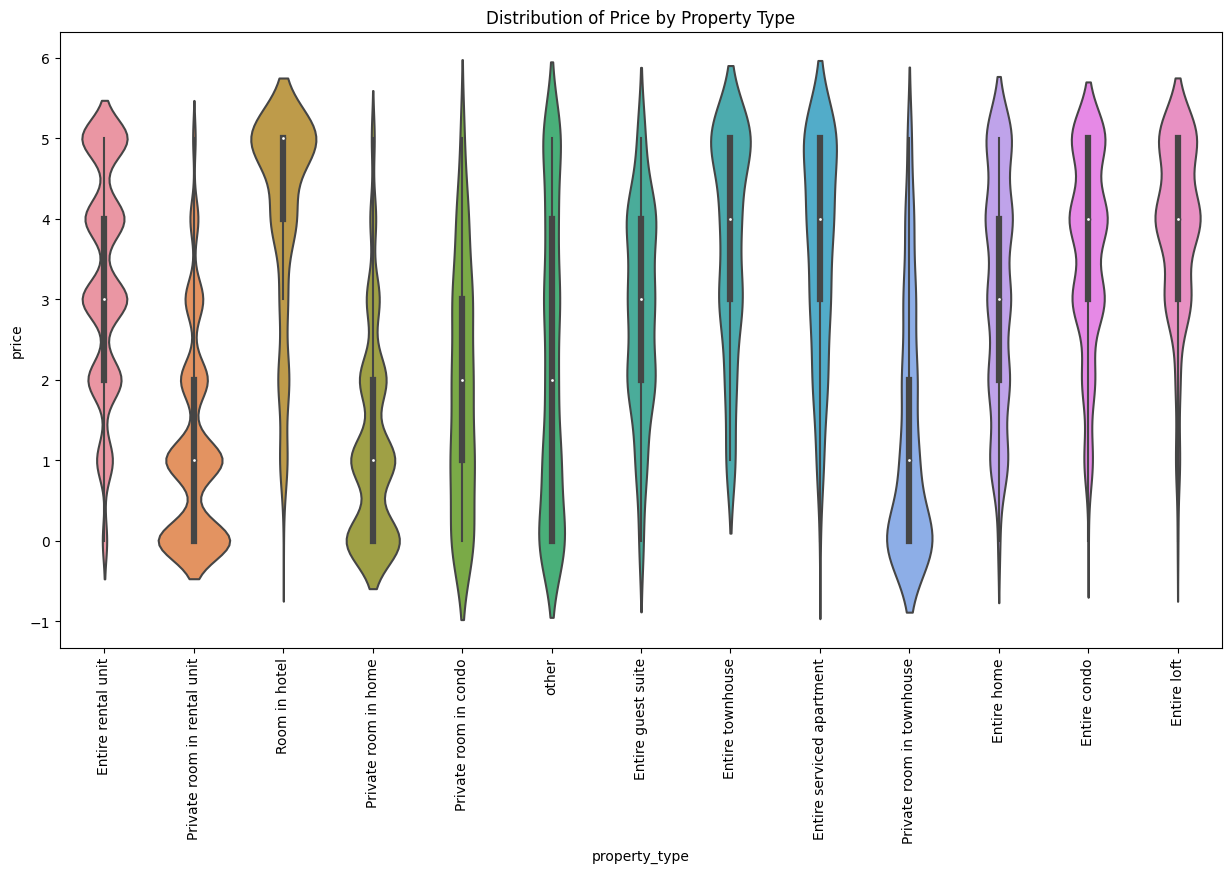

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.violinplot(x='property_type', y='price', data=df_train)
plt.xticks(rotation=90)
plt.title('Distribution of Price by Property Type')
plt.show()

In [114]:
df_train["neighbourhood_cleansed"] = df_train["neighbourhood_cleansed"].apply(lambda x: "other" if df_train["neighbourhood_cleansed"].value_counts()[x] < 250 else x)

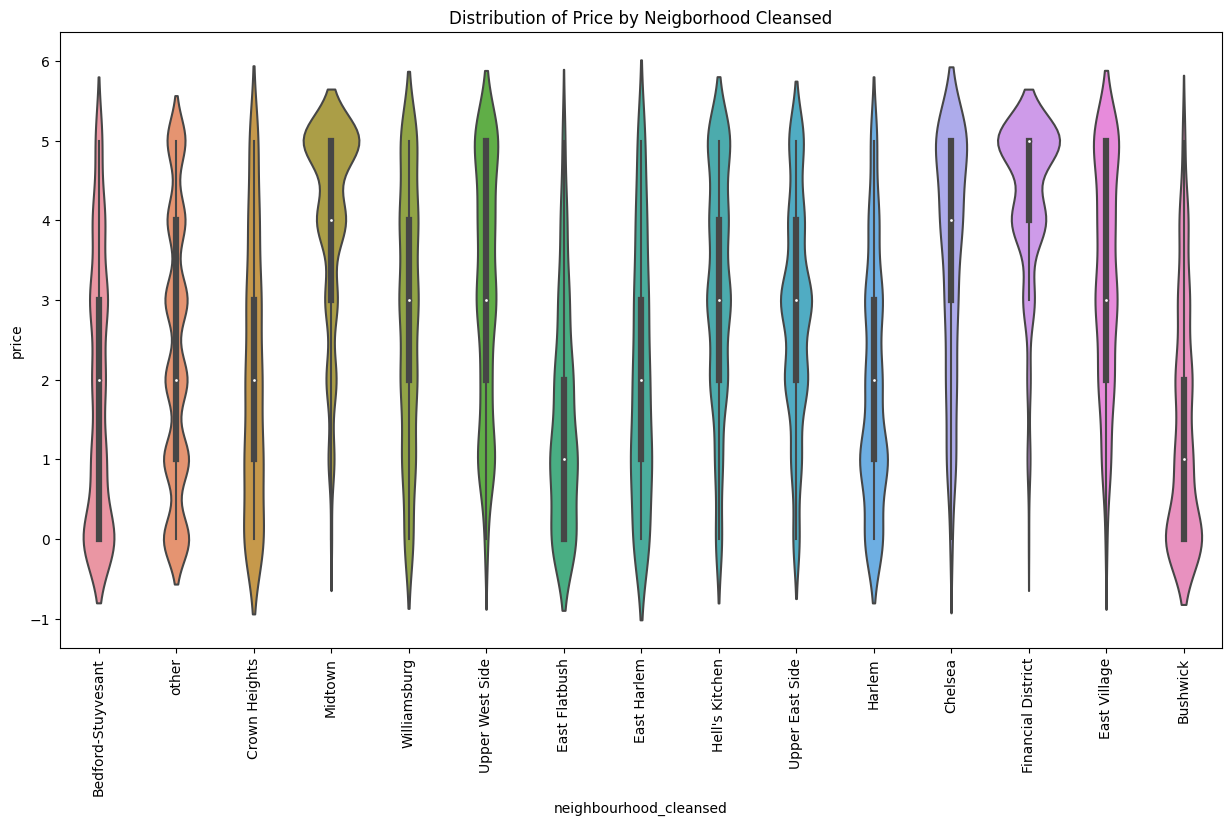

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.violinplot(x='neighbourhood_cleansed', y='price', data=df_train)
plt.xticks(rotation=90)
plt.title('Distribution of Price by Neigborhood Cleansed')
plt.show()

In [118]:
path = '/Users/simenguttormsen/Dropbox/SimenDuke/CompSci671/KaggleProject/cs-671-fall-2024-final-project/'
# Load the data
X_train = pd.read_csv(path + "X_train_processed.csv")
y_train = pd.read_csv(path + "y_train_processed.csv")

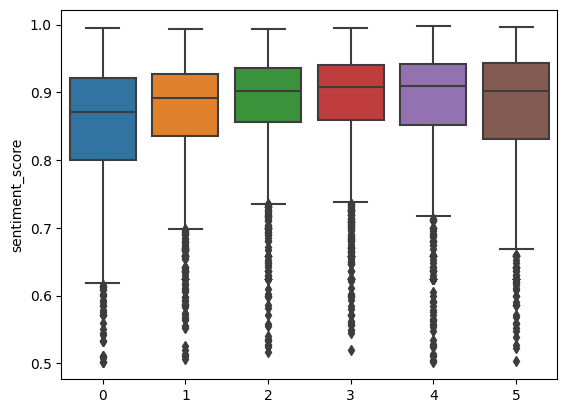

In [127]:
# only include values with sentiment > 0.3
X_train_new = X_train[X_train["sentiment_score"] > 0.5]
y_train_new = y_train[X_train["sentiment_score"] > 0.5]

# make boxplot with luxurry_level and price
sns.boxplot(x=y_train_new.values.ravel(), y= X_train_new["sentiment_score"])
plt.show()

# Note: this boxplot might be alittle biased as there are very few values for some of the luxury levels